In [1]:
!pip install -Uqq fastai nbdev graphviz azure-cognitiveservices-search-imagesearch

In [2]:
from fastai.vision.all import *
from utils import *

In [3]:
labels = ['minecraft', 'real-world']
queries = ['minecraft photography', 'daily life photography']
path = Path('extras')

if not path.exists():
    path.mkdir()
    for idx, o in enumerate(labels):
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(queries[idx])
        download_images(dest, urls=results)

In [4]:
fns = get_image_files(path)
len(fns)

346

In [5]:
failed = verify_images(fns)
len(failed)

17

In [6]:
failed.map(Path.unlink);

In [7]:
sceneries = DataBlock(
     blocks=(ImageBlock, CategoryBlock),
     get_items=get_image_files,
     splitter=RandomSplitter(valid_pct=0.2, seed=42),
     get_y=parent_label,
     item_tfms=Resize(128))
dls = sceneries.dataloaders(path)

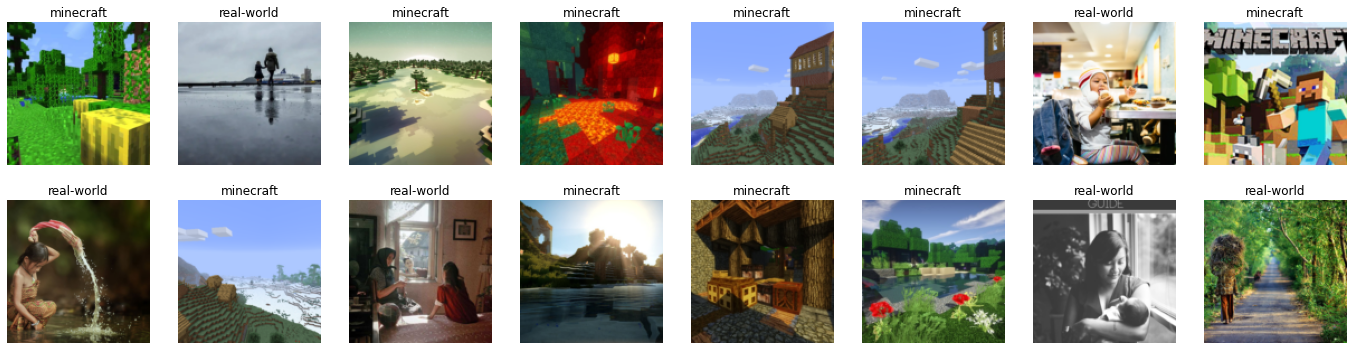

In [8]:
dls.valid.show_batch(max_n=16, nrows=2)

In [9]:
sceneries = sceneries.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = sceneries.dataloaders(path)

In [20]:
learn = vision_learner(dls, resnet34, metrics=error_rate, path='models/model.pth')
learn.fine_tune(10)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.058748,0.203949,0.092308,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.342510,0.134214,0.061538,00:06
1,0.217559,0.059910,0.030769,00:06
2,0.170714,0.062083,0.030769,00:06
3,0.131178,0.064585,0.030769,00:05
4,0.107385,0.069816,0.030769,00:05
5,0.097859,0.072284,0.046154,00:06
6,0.081850,0.078558,0.030769,00:06
7,0.070175,0.075317,0.030769,00:06
8,0.061378,0.072468,0.030769,00:06
9,0.054067,0.070311,0.030769,00:06


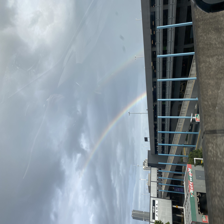

In [26]:
imgPaths = ['test.jpg']
images = []

for i in imgPaths:
    im = PILImage.create(i)
    images.append(im.resize((224,224)))
    
for im in images:
    im.show()

In [33]:
learn.path = Path('.')

In [34]:
learn.export()

In [37]:
learn.save('new-model')

Path('/notebooks/models/new-model.pth')